In [184]:
import pandas as pd 
import numpy as np  

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline 

In [185]:
# data https://www.datosabiertos.gob.pe/dataset/fallecidos-hospitalizados-y-vacunados-por-covid-19

In [186]:
df = pd.read_csv('TB_FALLECIDO_HOSP_VAC.csv', sep = ';')

In [187]:
# df.to_csv('TB_FALLECIDO_HOSP_VAC_.csv', sep = ',', index = False)

In [188]:
df.head()

,id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,fabricante_dosis3,clasificacion_vacuna4,fecha_dosis4,fabricante_dosis4,clasificacion_vacuna5,fecha_dosis5,fabricante_dosis5,clasificacion_vacuna6,fecha_dosis6,fabricante_dosis6
0,4176017,21/01/2022,75,M,Criterio SINADEF,150142,LIMA,LIMA,VILLA EL SALVADOR,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23086642,26/04/2021,53,F,Criterio virológico,21806,ANCASH,SANTA,NEPEÑA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13178121,14/03/2021,52,F,Criterio virológico,150142,LIMA,LIMA,VILLA EL SALVADOR,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17662628,24/03/2021,52,F,Criterio virológico,150142,LIMA,LIMA,VILLA EL SALVADOR,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1309244,9/05/2021,76,F,Criterio virológico,150124,LIMA,LIMA,PUCUSANA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
df.columns

Index(['id_persona', 'fecha_fallecimiento', 'edad', 'sexo',
       'criterio_fallecido', 'ubigeo_cdc', 'dpt_cdc', 'prov_cdc', 'dist_cdc',
       'cdc_positividad', 'fecha_dosis1', 'fecha_dosis2', 'flag_hospitalizado',
       'eess_renaes', 'eess_diresa', 'eess_red', 'eess_nombre',
       'fecha_ingreso_hosp', 'flag_uci', 'fecha_ingreso_uci',
       'fecha_ingreso_ucin', 'con_oxigeno', 'con_ventilacion',
       'fecha_segumiento_hosp_ultimo', 'evolucion_hosp_ultimo',
       'ubigeo_inei_domicilio', 'dep_domicilio', 'prov_domicilio',
       'dist_domicilio', 'flag_vacuna', 'clasificacion_vacuna1',
       'fabricante_dosis1', 'clasificacion_vacuna2', 'fabricante_dosis2',
       'clasificacion_vacuna3', 'fecha_dosis3', 'fabricante_dosis3',
       'clasificacion_vacuna4', 'fecha_dosis4', 'fabricante_dosis4',
       'clasificacion_vacuna5', 'fecha_dosis5', 'fabricante_dosis5',
       'clasificacion_vacuna6', 'fecha_dosis6', 'fabricante_dosis6'],
      dtype='object')

In [190]:
id_customer = df['id_persona']
label = df['flag_uci']

Total No. Of uci :-  4845
Total No. Of no uci :-  119583


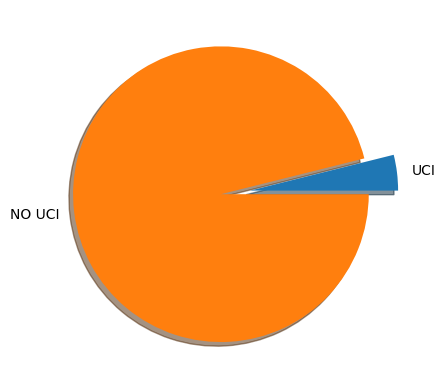

In [191]:
# seeing the distribution of classes, this will help us to identify which types 

len_no_uci = len(df['flag_uci'][df.flag_uci == 0])
len_uci = len(df['flag_uci'][df.flag_uci == 1])

arr = np.array([len_uci , len_no_uci]) 
labels = ['UCI', 'NO UCI'] 
print("Total No. Of uci :- ", len_uci)
print("Total No. Of no uci :- ", len_no_uci)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 


In [192]:
df.describe()

,id_persona,edad,ubigeo_cdc,cdc_positividad,fecha_dosis1,fecha_dosis2,flag_hospitalizado,eess_renaes,flag_uci,con_oxigeno,...,fabricante_dosis3,clasificacion_vacuna4,fecha_dosis4,fabricante_dosis4,clasificacion_vacuna5,fecha_dosis5,fabricante_dosis5,clasificacion_vacuna6,fecha_dosis6,fabricante_dosis6
count,1.244280e+05,124428.000000,124428.000000,124428.000000,0.0,0.0,124428.000000,124428.000000,124428.000000,124428.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.761061e+07,66.403727,131987.664842,0.001816,NaN,NaN,0.188270,1177.938253,0.038938,0.171754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.399664e+07,16.066782,51903.854780,0.042580,NaN,NaN,0.390929,3657.632815,0.193448,0.377168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.200000e+01,0.000000,10101.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.218078e+06,57.000000,110102.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.362256e+07,68.000000,150108.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.621388e+07,78.000000,150137.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.200498e+07,113.000000,250401.000000,1.000000,NaN,NaN,1.000000,28025.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
print(f"No. of Null Values:-" ) 
df.isnull().sum() 

No. of Null Values:-


id_persona                           0
fecha_fallecimiento                  0
edad                                 0
sexo                                 0
criterio_fallecido                   0
ubigeo_cdc                           0
dpt_cdc                              0
prov_cdc                             0
dist_cdc                             0
cdc_positividad                      0
fecha_dosis1                    124428
fecha_dosis2                    124428
flag_hospitalizado                   0
eess_renaes                          0
eess_diresa                     101002
eess_red                        101002
eess_nombre                     101002
fecha_ingreso_hosp              101002
flag_uci                             0
fecha_ingreso_uci               120631
fecha_ingreso_ucin              122896
con_oxigeno                          0
con_ventilacion                      0
fecha_segumiento_hosp_ultimo    101002
evolucion_hosp_ultimo           101136
ubigeo_inei_domicilio    

In [194]:
df.drop(columns=df.loc[:,df.isnull().sum() == 124428].columns,axis=1, inplace= True)

In [195]:
print(f"No. of Null Values:-" ) 
df.isnull().sum() 

No. of Null Values:-


id_persona                           0
fecha_fallecimiento                  0
edad                                 0
sexo                                 0
criterio_fallecido                   0
ubigeo_cdc                           0
dpt_cdc                              0
prov_cdc                             0
dist_cdc                             0
cdc_positividad                      0
flag_hospitalizado                   0
eess_renaes                          0
eess_diresa                     101002
eess_red                        101002
eess_nombre                     101002
fecha_ingreso_hosp              101002
flag_uci                             0
fecha_ingreso_uci               120631
fecha_ingreso_ucin              122896
con_oxigeno                          0
con_ventilacion                      0
fecha_segumiento_hosp_ultimo    101002
evolucion_hosp_ultimo           101136
ubigeo_inei_domicilio            35623
dep_domicilio                    35623
prov_domicilio           

In [196]:
df.dtypes

id_persona                        int64
fecha_fallecimiento              object
edad                              int64
sexo                             object
criterio_fallecido               object
ubigeo_cdc                        int64
dpt_cdc                          object
prov_cdc                         object
dist_cdc                         object
cdc_positividad                   int64
flag_hospitalizado                int64
eess_renaes                       int64
eess_diresa                      object
eess_red                         object
eess_nombre                      object
fecha_ingreso_hosp               object
flag_uci                          int64
fecha_ingreso_uci                object
fecha_ingreso_ucin               object
con_oxigeno                       int64
con_ventilacion                   int64
fecha_segumiento_hosp_ultimo     object
evolucion_hosp_ultimo            object
ubigeo_inei_domicilio           float64
dep_domicilio                    object


In [197]:
df.drop(columns=['id_persona','dpt_cdc','prov_cdc','dist_cdc','eess_diresa','eess_red','eess_nombre','dep_domicilio','prov_domicilio','dist_domicilio','con_ventilacion','con_oxigeno'],axis=1, inplace= True)

In [198]:
df.isnull().sum()

fecha_fallecimiento                  0
edad                                 0
sexo                                 0
criterio_fallecido                   0
ubigeo_cdc                           0
cdc_positividad                      0
flag_hospitalizado                   0
eess_renaes                          0
fecha_ingreso_hosp              101002
flag_uci                             0
fecha_ingreso_uci               120631
fecha_ingreso_ucin              122896
fecha_segumiento_hosp_ultimo    101002
evolucion_hosp_ultimo           101136
ubigeo_inei_domicilio            35623
flag_vacuna                          0
dtype: int64

In [199]:
df['fecha_fallecimiento'] = pd.to_datetime(df['fecha_fallecimiento'], format='%d/%m/%Y')
df['fecha_ingreso_uci'] = pd.to_datetime(df['fecha_ingreso_uci'], format='%d/%m/%Y')
df['fecha_ingreso_ucin'] = pd.to_datetime(df['fecha_ingreso_ucin'], format='%d/%m/%Y')
df['fecha_ingreso_hosp'] = pd.to_datetime(df['fecha_ingreso_hosp'], format='%d/%m/%Y')
df['fecha_segumiento_hosp_ultimo'] = pd.to_datetime(df['fecha_segumiento_hosp_ultimo'], format='%d/%m/%Y')

In [200]:
df.dtypes

fecha_fallecimiento             datetime64[ns]
edad                                     int64
sexo                                    object
criterio_fallecido                      object
ubigeo_cdc                               int64
cdc_positividad                          int64
flag_hospitalizado                       int64
eess_renaes                              int64
fecha_ingreso_hosp              datetime64[ns]
flag_uci                                 int64
fecha_ingreso_uci               datetime64[ns]
fecha_ingreso_ucin              datetime64[ns]
fecha_segumiento_hosp_ultimo    datetime64[ns]
evolucion_hosp_ultimo                   object
ubigeo_inei_domicilio                  float64
flag_vacuna                              int64
dtype: object

In [201]:
df.loc[df['fecha_fallecimiento'] < df['fecha_ingreso_hosp'], ['fecha_fallecimiento','criterio_fallecido','fecha_ingreso_uci','fecha_ingreso_ucin','fecha_ingreso_hosp','fecha_segumiento_hosp_ultimo','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,fecha_ingreso_uci,fecha_ingreso_ucin,fecha_ingreso_hosp,fecha_segumiento_hosp_ultimo,evolucion_hosp_ultimo
998,2021-09-29,Criterio SINADEF,NaT,NaT,2021-09-30,2021-09-30,defuncion
1014,2021-04-04,Criterio virológico,NaT,NaT,2021-04-05,2021-04-06,alta
3086,2021-02-13,Criterio investigación Epidemiológica,NaT,NaT,2021-02-18,2021-02-19,defuncion
3206,2021-02-03,Criterio SINADEF,NaT,NaT,2021-02-04,2021-02-04,defuncion
4071,2022-07-25,Criterio SINADEF,NaT,NaT,2022-07-26,2022-07-26,desfavorable
...,...,...,...,...,...,...,...
116185,2021-01-06,Criterio SINADEF,NaT,NaT,2021-02-06,2021-02-06,defuncion
116951,2022-01-06,Criterio SINADEF,NaT,NaT,2022-01-07,2022-01-07,defuncion
117358,2021-06-17,Criterio virológico,NaT,2021-07-03,2021-06-29,2021-07-17,defuncion
118214,2022-02-07,Criterio SINADEF,NaT,NaT,2022-02-09,2022-02-09,defuncion


In [202]:
df.loc[~df['fecha_fallecimiento'].isna(), ['fecha_fallecimiento','criterio_fallecido','fecha_ingreso_uci','fecha_ingreso_ucin','fecha_ingreso_hosp','fecha_segumiento_hosp_ultimo','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,fecha_ingreso_uci,fecha_ingreso_ucin,fecha_ingreso_hosp,fecha_segumiento_hosp_ultimo,evolucion_hosp_ultimo
0,2022-01-21,Criterio SINADEF,NaT,NaT,2022-01-20,2022-01-21,defuncion
1,2021-04-26,Criterio virológico,NaT,NaT,NaT,NaT,NaN
2,2021-03-14,Criterio virológico,NaT,NaT,NaT,NaT,NaN
3,2021-03-24,Criterio virológico,NaT,NaT,NaT,NaT,NaN
4,2021-05-09,Criterio virológico,NaT,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...
124423,2021-03-01,Criterio SINADEF,NaT,NaT,NaT,NaT,NaN
124424,2021-06-02,Criterio virológico,NaT,NaT,NaT,NaT,NaN
124425,2021-02-19,Criterio SINADEF,NaT,NaT,NaT,NaT,NaN
124426,2021-06-21,Criterio SINADEF,NaT,2021-06-20,2021-06-20,2021-06-21,defuncion


In [203]:
df['dias_hospitalizado'] = (df['fecha_fallecimiento'] - df['fecha_ingreso_hosp']).dt.days
df['dias_seguimiento_hosp'] = (df['fecha_fallecimiento'] - df['fecha_segumiento_hosp_ultimo']).dt.days
df['dias_uci'] = (df['fecha_fallecimiento'] - df['fecha_ingreso_uci']).dt.days
df['dias_ucin'] = (df['fecha_fallecimiento'] - df['fecha_ingreso_ucin']).dt.days


In [204]:
df['dias_hospitalizado'] = df['dias_hospitalizado'].fillna(0).astype(int)
df['dias_seguimiento_hosp'] = df['dias_seguimiento_hosp'].fillna(0).astype(int)
df['dias_uci'] = df['dias_uci'].fillna(0).astype(int)
df['dias_ucin'] = df['dias_ucin'].fillna(0).astype(int)

In [205]:
df.loc[df['dias_hospitalizado'] < 0,['dias_hospitalizado']] = 0
df.loc[df['dias_seguimiento_hosp'] < 0,'dias_seguimiento_hosp'] = 0
df.loc[df['dias_uci'] < 0,'dias_uci'] = 0
df.loc[df['dias_ucin'] < 0,'dias_ucin'] = 0

In [206]:
df.loc[df['evolucion_hosp_ultimo'].isna(), ['fecha_fallecimiento','criterio_fallecido','dias_hospitalizado','dias_seguimiento_hosp','dias_uci','dias_ucin','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,dias_hospitalizado,dias_seguimiento_hosp,dias_uci,dias_ucin,evolucion_hosp_ultimo
1,2021-04-26,Criterio virológico,0,0,0,0,NaN
2,2021-03-14,Criterio virológico,0,0,0,0,NaN
3,2021-03-24,Criterio virológico,0,0,0,0,NaN
4,2021-05-09,Criterio virológico,0,0,0,0,NaN
6,2021-04-11,Criterio SINADEF,0,0,0,0,NaN
...,...,...,...,...,...,...,...
124420,2021-02-17,Criterio SINADEF,0,0,0,0,NaN
124422,2021-07-17,Criterio investigación Epidemiológica,0,0,0,0,NaN
124423,2021-03-01,Criterio SINADEF,0,0,0,0,NaN
124424,2021-06-02,Criterio virológico,0,0,0,0,NaN


In [207]:
df.loc[df['evolucion_hosp_ultimo'] == 'alta_voluntaria', ['fecha_fallecimiento','criterio_fallecido','dias_hospitalizado','dias_seguimiento_hosp','dias_uci','dias_ucin','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,dias_hospitalizado,dias_seguimiento_hosp,dias_uci,dias_ucin,evolucion_hosp_ultimo
232,2021-04-26,Criterio SINADEF,45,37,0,0,alta_voluntaria
428,2022-02-04,Criterio virológico,337,336,0,0,alta_voluntaria
717,2021-03-29,Criterio virológico,9,9,0,0,alta_voluntaria
961,2021-01-29,Criterio serológico,3,1,0,0,alta_voluntaria
1436,2021-01-22,Criterio serológico,2,0,0,0,alta_voluntaria
...,...,...,...,...,...,...,...
118076,2021-07-27,Criterio virológico,153,151,0,0,alta_voluntaria
118965,2021-07-13,Criterio SINADEF,16,14,0,0,alta_voluntaria
120596,2021-03-17,Criterio virológico,8,6,0,0,alta_voluntaria
123668,2021-07-18,Criterio serológico,3,2,0,0,alta_voluntaria


In [208]:
df.drop(columns=['fecha_fallecimiento','fecha_ingreso_hosp','fecha_ingreso_uci','fecha_ingreso_ucin','fecha_segumiento_hosp_ultimo','dias_uci','dias_ucin'],axis=1,inplace = True)

In [209]:
df.columns

Index(['edad', 'sexo', 'criterio_fallecido', 'ubigeo_cdc', 'cdc_positividad',
       'flag_hospitalizado', 'eess_renaes', 'flag_uci',
       'evolucion_hosp_ultimo', 'ubigeo_inei_domicilio', 'flag_vacuna',
       'dias_hospitalizado', 'dias_seguimiento_hosp'],
      dtype='object')

In [210]:
df.dtypes

edad                       int64
sexo                      object
criterio_fallecido        object
ubigeo_cdc                 int64
cdc_positividad            int64
flag_hospitalizado         int64
eess_renaes                int64
flag_uci                   int64
evolucion_hosp_ultimo     object
ubigeo_inei_domicilio    float64
flag_vacuna                int64
dias_hospitalizado         int64
dias_seguimiento_hosp      int64
dtype: object

In [211]:
# label = df['flag_uci']

In [212]:
df["ubigeo_cdc"] = df["ubigeo_cdc"].astype("str")
df["cdc_positividad"] = df["cdc_positividad"].astype("str")
df["flag_hospitalizado"] = df["flag_hospitalizado"].astype("str")
df["eess_renaes"] = df["eess_renaes"].astype("str")
# df["con_oxigeno"] = df["con_oxigeno"].astype("str")
# df["con_ventilacion"] = df["con_ventilacion"].astype("str")
df["ubigeo_inei_domicilio"] = df["ubigeo_inei_domicilio"].astype("str")
df["flag_vacuna"] = df["flag_vacuna"].astype("str")
df["flag_uci"] = df["flag_uci"].astype("str")


In [213]:
cat_cols = df[['sexo', 'criterio_fallecido', 'ubigeo_cdc', 'cdc_positividad',
       'flag_hospitalizado', 'eess_renaes', 
       'evolucion_hosp_ultimo', 'ubigeo_inei_domicilio',
       'flag_vacuna','flag_uci']]

In [214]:
cat_cols.drop(columns=[label.name],axis=1,inplace=True)

C:\Users\kainak0\AppData\Local\Temp\ipykernel_32580\1527513043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols.drop(columns=[label.name],axis=1,inplace=True)


In [215]:
cat_cols

,sexo,criterio_fallecido,ubigeo_cdc,cdc_positividad,flag_hospitalizado,eess_renaes,evolucion_hosp_ultimo,ubigeo_inei_domicilio,flag_vacuna
0,M,Criterio SINADEF,150142,0,1,23159,defuncion,150142.0,0
1,F,Criterio virológico,21806,0,0,0,NaN,21806.0,0
2,F,Criterio virológico,150142,0,0,0,NaN,150142.0,0
3,F,Criterio virológico,150142,0,0,0,NaN,150142.0,0
4,F,Criterio virológico,150124,0,0,0,NaN,150124.0,0
...,...,...,...,...,...,...,...,...,...
124423,F,Criterio SINADEF,150110,0,0,0,NaN,nan,0
124424,M,Criterio virológico,140109,0,0,0,NaN,140101.0,0
124425,M,Criterio SINADEF,110106,0,0,0,NaN,nan,0
124426,F,Criterio SINADEF,30213,0,1,4131,defuncion,30213.0,0


In [216]:
cat_cols.dtypes

sexo                     object
criterio_fallecido       object
ubigeo_cdc               object
cdc_positividad          object
flag_hospitalizado       object
eess_renaes              object
evolucion_hosp_ultimo    object
ubigeo_inei_domicilio    object
flag_vacuna              object
dtype: object

In [217]:
cat_cols.criterio_fallecido.unique()

array(['Criterio SINADEF', 'Criterio virológico', 'Criterio serológico',
       'Criterio investigación Epidemiológica',
       'Criterio nexo epidemiológico', 'Criterio radiológico',
       'Criterio clínico', 'NotiCovid', 'sinadef'], dtype=object)

In [218]:
cat_cols.evolucion_hosp_ultimo.unique()

array(['defuncion', nan, 'alta', 'referido', 'alta_voluntaria',
       'desfavorable', 'estacionario', 'favorable'], dtype=object)

In [219]:
cat_cols.flag_vacuna.unique()

array(['0'], dtype=object)

In [220]:
cat_cols.columns

Index(['sexo', 'criterio_fallecido', 'ubigeo_cdc', 'cdc_positividad',
       'flag_hospitalizado', 'eess_renaes', 'evolucion_hosp_ultimo',
       'ubigeo_inei_domicilio', 'flag_vacuna'],
      dtype='object')

In [221]:
num_cols = df[['edad','dias_hospitalizado','dias_seguimiento_hosp']]

In [222]:
num_cols.describe()

,edad,dias_hospitalizado,dias_seguimiento_hosp
count,124428.000000,124428.000000,124428.000000
mean,66.403727,3.537009,1.920187
std,16.066782,30.561161,29.139509
min,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000
50%,68.000000,0.000000,0.000000
75%,78.000000,0.000000,0.000000
max,113.000000,1123.000000,1122.000000


<Axes: >

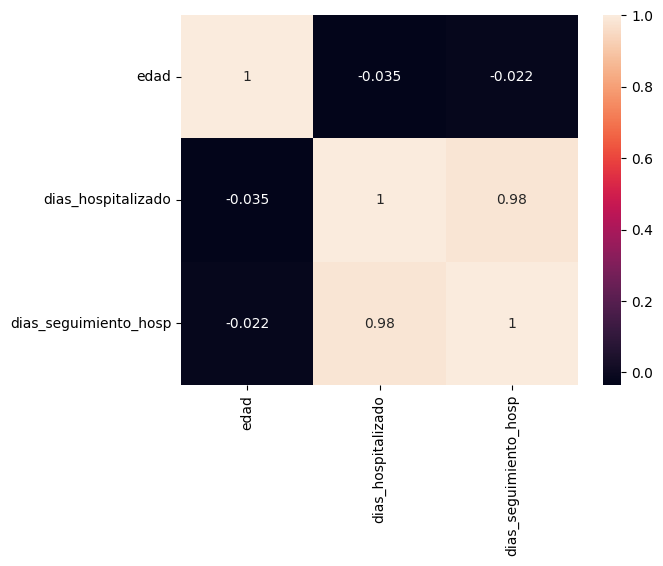

In [223]:
sns.heatmap(num_cols.corr(),annot=True)

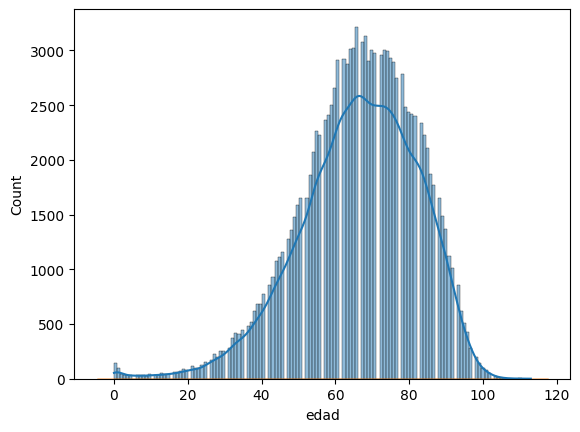

In [224]:
# seeing the distribution of Age  
sns.histplot(num_cols["edad"], kde = True) 
sns.kdeplot(num_cols["edad"], fill=True)
plt.show()
plt.show() 

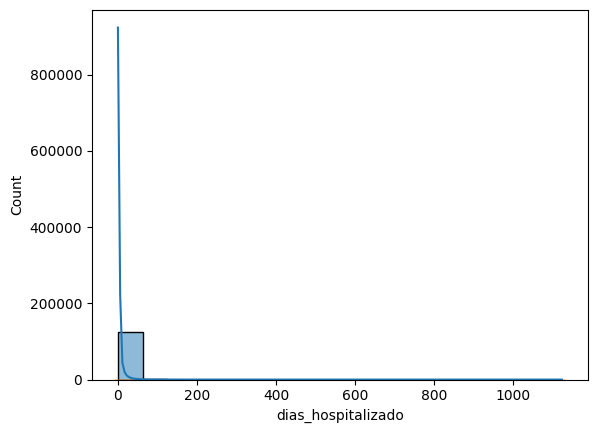

In [225]:
sns.histplot(num_cols["dias_hospitalizado"], kde = True) 
sns.kdeplot(num_cols["dias_hospitalizado"], fill=True)
plt.show()
plt.show() 

In [226]:
df.dtypes

edad                      int64
sexo                     object
criterio_fallecido       object
ubigeo_cdc               object
cdc_positividad          object
flag_hospitalizado       object
eess_renaes              object
flag_uci                 object
evolucion_hosp_ultimo    object
ubigeo_inei_domicilio    object
flag_vacuna              object
dias_hospitalizado        int64
dias_seguimiento_hosp     int64
dtype: object

In [227]:
# sns.heatmap(cat_cols.corr(),annot=True)

In [228]:
df.drop(label.name,inplace = True, axis = 1) #eliminamos la variable target de la data original

In [229]:
df = pd.get_dummies(data = df) #transformamos las variables categóricas a numéricas

In [230]:
df.columns

Index(['edad', 'dias_hospitalizado', 'dias_seguimiento_hosp', 'sexo_F',
       'sexo_M', 'criterio_fallecido_Criterio SINADEF',
       'criterio_fallecido_Criterio clínico',
       'criterio_fallecido_Criterio investigación Epidemiológica',
       'criterio_fallecido_Criterio nexo epidemiológico',
       'criterio_fallecido_Criterio radiológico',
       ...
       'ubigeo_inei_domicilio_90715.0', 'ubigeo_inei_domicilio_90716.0',
       'ubigeo_inei_domicilio_90717.0', 'ubigeo_inei_domicilio_90718.0',
       'ubigeo_inei_domicilio_90719.0', 'ubigeo_inei_domicilio_90720.0',
       'ubigeo_inei_domicilio_90721.0', 'ubigeo_inei_domicilio_90722.0',
       'ubigeo_inei_domicilio_nan', 'flag_vacuna_0'],
      dtype='object', length=3665)

In [231]:
data_original = pd.concat([df, label,id_customer], axis=1)

In [232]:
# data_original.to_csv('data_processing.csv',encoding='utf-8',index=False)

In [233]:
data_original

,edad,dias_hospitalizado,dias_seguimiento_hosp,sexo_F,sexo_M,criterio_fallecido_Criterio SINADEF,criterio_fallecido_Criterio clínico,criterio_fallecido_Criterio investigación Epidemiológica,criterio_fallecido_Criterio nexo epidemiológico,criterio_fallecido_Criterio radiológico,...,ubigeo_inei_domicilio_90717.0,ubigeo_inei_domicilio_90718.0,ubigeo_inei_domicilio_90719.0,ubigeo_inei_domicilio_90720.0,ubigeo_inei_domicilio_90721.0,ubigeo_inei_domicilio_90722.0,ubigeo_inei_domicilio_nan,flag_vacuna_0,flag_uci,id_persona
0,75,1,0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,0,4176017
1,53,0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,23086642
2,52,0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,13178121
3,52,0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,17662628
4,76,0,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,1309244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124423,68,0,0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,0,36434505
124424,76,0,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,0,11009999
124425,76,0,0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,True,True,0,36360339
124426,84,1,0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,1,12335267


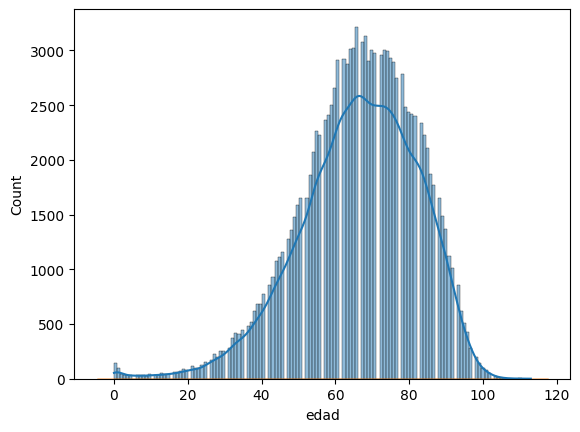

In [234]:
# seeing the distribution of Age  
sns.histplot(df["edad"], kde = True) 
sns.kdeplot(df["edad"], fill=True)
plt.show()
plt.show() 

In [235]:
# # checking the Correlation of our variables  

# corr = df.corr() 
# plt.subplots(figsize=(15,15))
# sns.heatmap(corr, annot=True) 

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.3)

In [237]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87099, 3665)
(37329, 3665)
(87099,)
(37329,)


In [238]:
X_train.columns

Index(['edad', 'dias_hospitalizado', 'dias_seguimiento_hosp', 'sexo_F',
       'sexo_M', 'criterio_fallecido_Criterio SINADEF',
       'criterio_fallecido_Criterio clínico',
       'criterio_fallecido_Criterio investigación Epidemiológica',
       'criterio_fallecido_Criterio nexo epidemiológico',
       'criterio_fallecido_Criterio radiológico',
       ...
       'ubigeo_inei_domicilio_90715.0', 'ubigeo_inei_domicilio_90716.0',
       'ubigeo_inei_domicilio_90717.0', 'ubigeo_inei_domicilio_90718.0',
       'ubigeo_inei_domicilio_90719.0', 'ubigeo_inei_domicilio_90720.0',
       'ubigeo_inei_domicilio_90721.0', 'ubigeo_inei_domicilio_90722.0',
       'ubigeo_inei_domicilio_nan', 'flag_vacuna_0'],
      dtype='object', length=3665)

In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [240]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Not UCI', 'UCI']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Not UCI', 'UCI']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     35895
           1       0.60      0.59      0.59      1434

    accuracy                           0.97     37329
   macro avg       0.79      0.79      0.79     37329
weighted avg       0.97      0.97      0.97     37329

AUC ROC :  0.7858395681033885


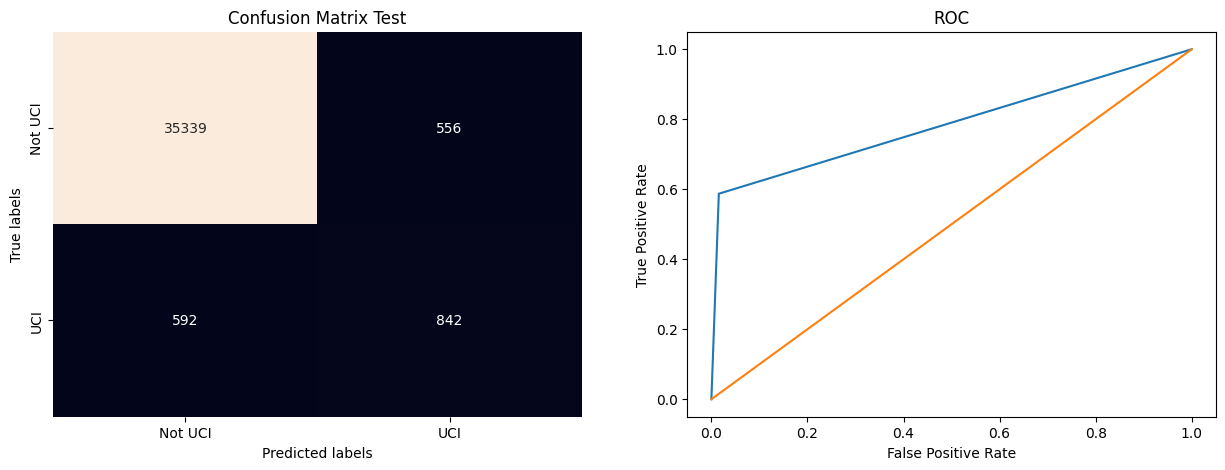

In [241]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

c:\Users\kainak0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35895
           1       0.77      0.48      0.59      1434

    accuracy                           0.97     37329
   macro avg       0.87      0.74      0.79     37329
weighted avg       0.97      0.97      0.97     37329

AUC ROC :  0.7394178802539485


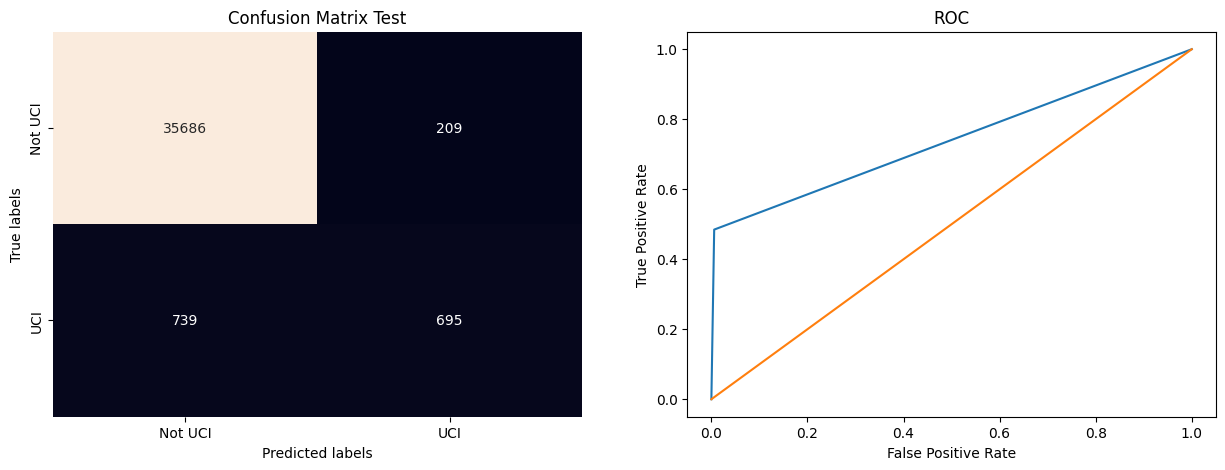

In [242]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     35895
           1       0.77      0.54      0.64      1434

    accuracy                           0.98     37329
   macro avg       0.88      0.77      0.81     37329
weighted avg       0.97      0.98      0.97     37329

AUC ROC :  0.7687905974014166


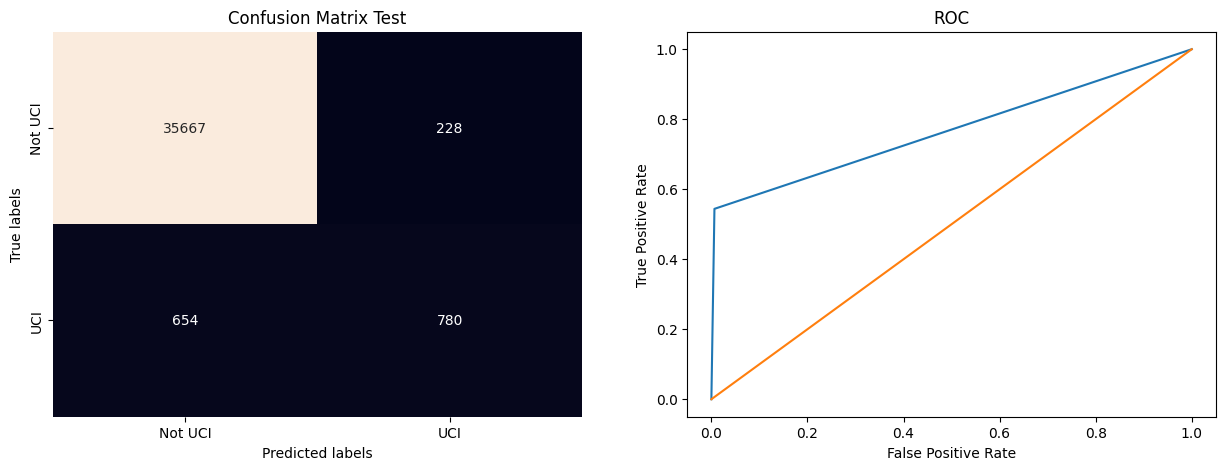

In [243]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35895
           1       0.78      0.62      0.69      1434

    accuracy                           0.98     37329
   macro avg       0.88      0.81      0.84     37329
weighted avg       0.98      0.98      0.98     37329

AUC ROC :  0.80753575194037


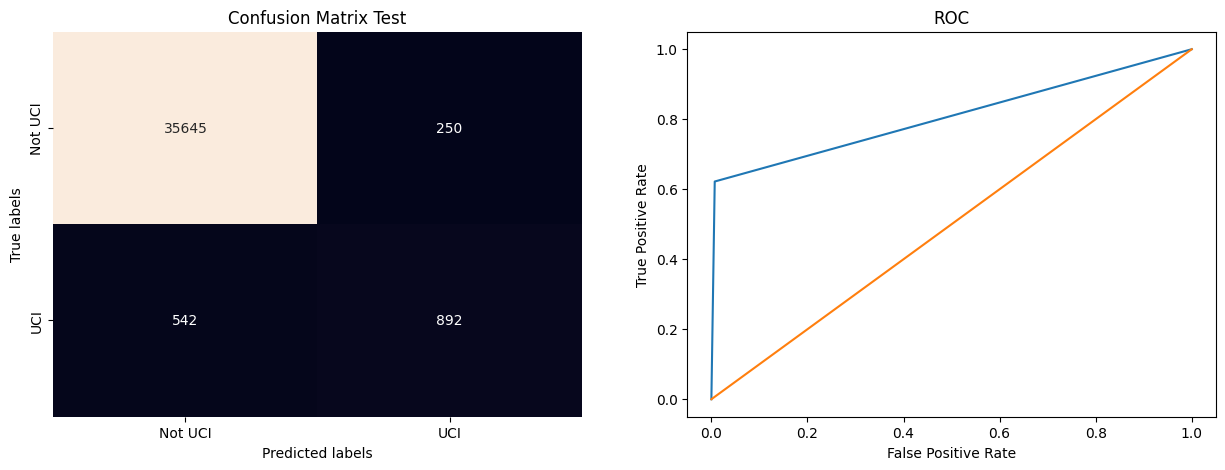

In [244]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

In [245]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}


RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30],
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]

                     }

In [246]:
from sklearn.utils import resample

upsample_data = data_original.copy() # Generar una copia de nuestra data original

majority = upsample_data[upsample_data[label.name]==1] # Muestra categoria
minority = upsample_data[upsample_data[label.name]==0] # Muestra categoria

In [260]:
print(len(majority))
print(len(minority))

4845
119583


In [247]:
majority.shape, minority.shape

((4845, 3667), (119583, 3667))

In [248]:
minority_upsampled = resample(minority, replace=True, n_samples=len(majority),random_state=1) # Sobremuestreo

In [249]:
minority_upsampled.shape

(4845, 3667)

In [250]:
del(upsample_data) # elimina
upsample_data = pd.concat([majority,minority_upsampled])

In [251]:
upsample_data.shape

(9690, 3667)

In [252]:
upsample_data[label.name].value_counts()

flag_uci
1    4845
0    4845
Name: count, dtype: int64

In [253]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9690 entries, 10 to 103043
Columns: 3667 entries, edad to id_persona
dtypes: bool(3662), int64(5)
memory usage: 34.3 MB


In [254]:
id_customer_upsample = upsample_data[id_customer.name]
label_upsample = upsample_data[label.name]
upsample_data.drop(label.name,inplace = True, axis = 1)
upsample_data.drop(id_customer.name,inplace = True, axis = 1)

In [255]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1440
           1       0.92      0.93      0.92      1467

    accuracy                           0.92      2907
   macro avg       0.92      0.92      0.92      2907
weighted avg       0.92      0.92      0.92      2907

AUC ROC :  0.9208226823449216


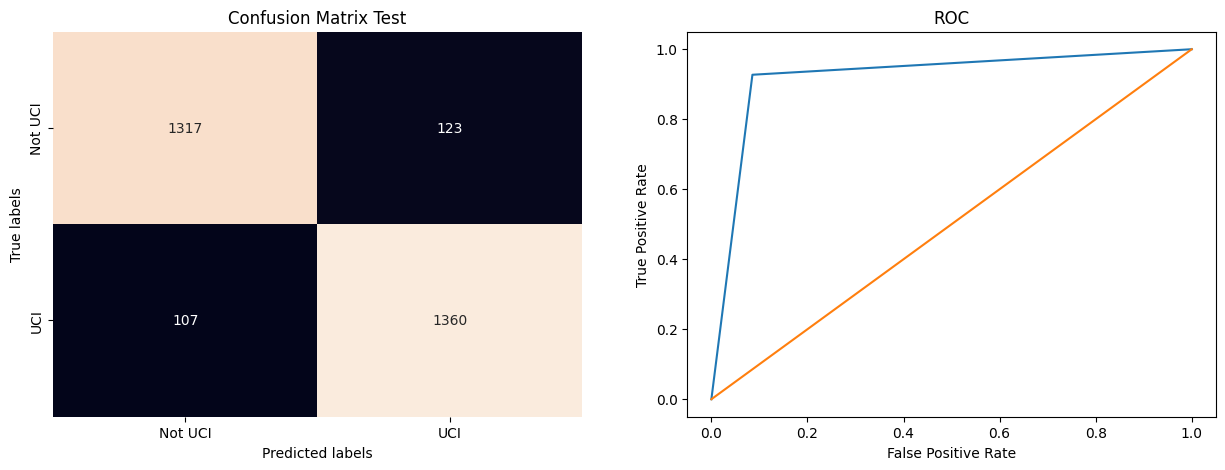

In [256]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

c:\Users\kainak0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.90      0.93      1440
           1       0.91      0.98      0.94      1467

    accuracy                           0.94      2907
   macro avg       0.94      0.94      0.94      2907
weighted avg       0.94      0.94      0.94      2907

AUC ROC :  0.9377108895705522


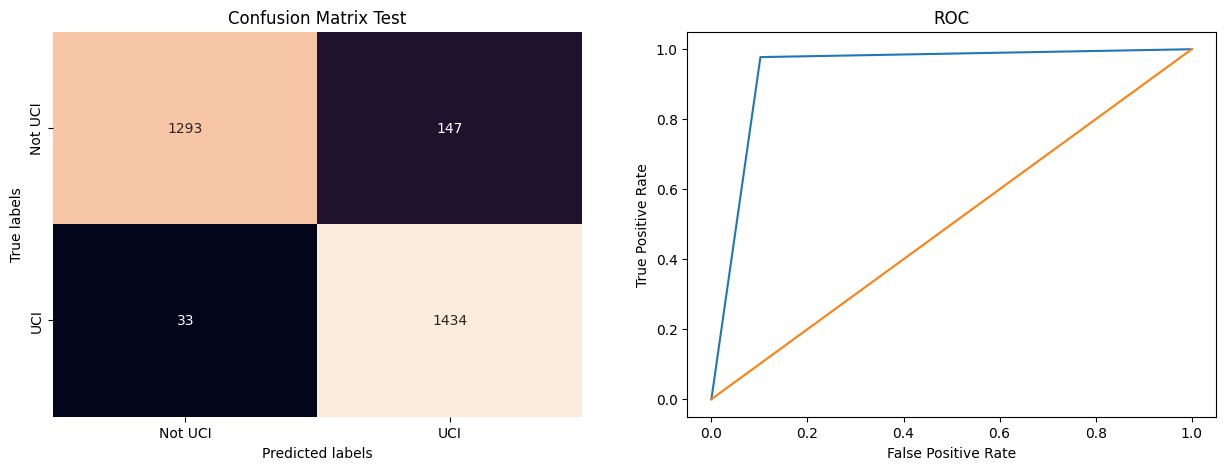

In [257]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1440
           1       0.89      0.99      0.94      1467

    accuracy                           0.93      2907
   macro avg       0.94      0.93      0.93      2907
weighted avg       0.94      0.93      0.93      2907

AUC ROC :  0.933467535787321


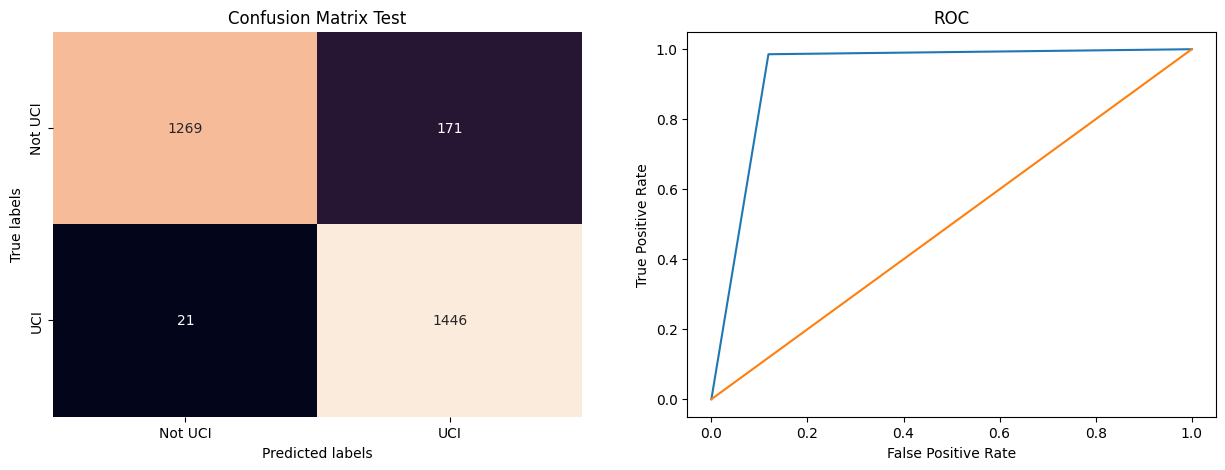

In [258]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1440
           1       0.92      0.97      0.94      1467

    accuracy                           0.94      2907
   macro avg       0.94      0.94      0.94      2907
weighted avg       0.94      0.94      0.94      2907

AUC ROC :  0.9388292433537831


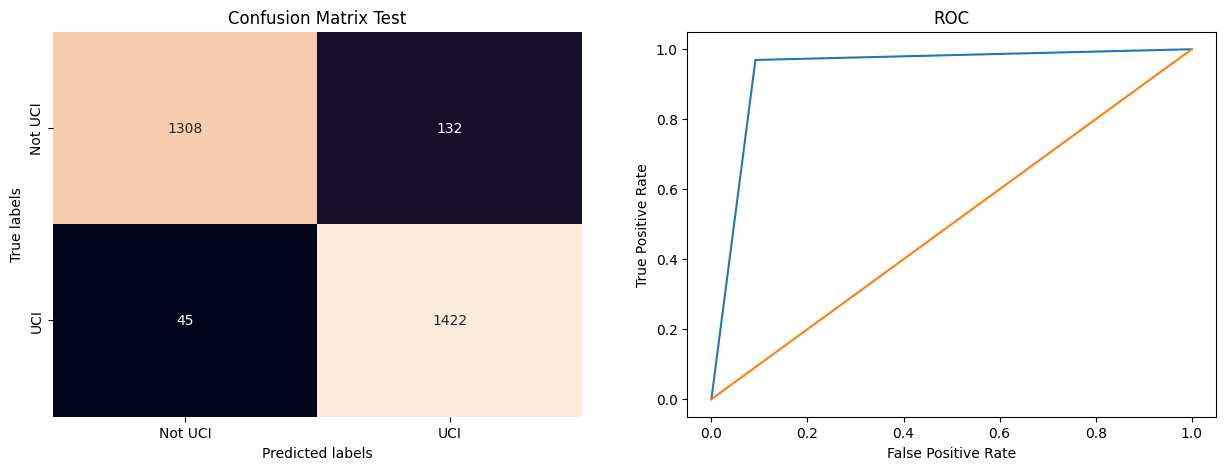

In [259]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)